In [12]:
# Application SA Heart

import random as rd
import numpy as np 
import pandas as pd
import math  
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [13]:
tab=pd.read_csv("SAheart.txt", delimiter=",")
#print(tab)
np.shape(tab)

(462, 11)

In [14]:
Y = tab["chd"]
Xnum = tab.loc[:,['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']]
X=Xnum.to_numpy()

In [15]:
# Dividing the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) 

In [16]:
# DecisionTree, Bagging and random forest model
model_1 = DecisionTreeClassifier()
model_2 = BaggingClassifier()
model_3 = RandomForestClassifier()

In [18]:
# Train the models 
model_1.fit(X_train,Y_train)
model_2.fit(X_train,Y_train)
model_3.fit(X_train,Y_train)

RandomForestClassifier()

In [19]:
# Predict the target Y_test
Y_pred1 = model_1.predict(X_test)
Y_pred2 = model_2.predict(X_test)
Y_pred3 = model_3.predict(X_test)

In [20]:
# Evaluation (Accuracy, Precision, recall and F1-score) of the 3 models
print("Usual Indicators of the classification decision tree :")
print("Accuracy:", accuracy_score(Y_test, Y_pred1))
print("Precision:", precision_score(Y_test, Y_pred1))
print("Recall:", recall_score(Y_test, Y_pred1))
print("F1-score:", f1_score(Y_test, Y_pred1))
print("\n")
print("Usual Indicators of the baggin model :")
print("Accuracy:", accuracy_score(Y_test, Y_pred2))
print("Precision:", precision_score(Y_test, Y_pred2))
print("Recall:", recall_score(Y_test, Y_pred2))
print("F1-score:", f1_score(Y_test, Y_pred2))
print("\n")
print("Usual Indicators of the random forest model :")
print("Accuracy:", accuracy_score(Y_test, Y_pred3))
print("Precision:", precision_score(Y_test, Y_pred3))
print("Recall:", recall_score(Y_test, Y_pred3))
print("F1-score:", f1_score(Y_test, Y_pred3))

Usual Indicators of the classification decision tree :
Accuracy: 0.6774193548387096
Precision: 0.45161290322580644
Recall: 0.5185185185185185
F1-score: 0.48275862068965514


Usual Indicators of the baggin model :
Accuracy: 0.7204301075268817
Precision: 0.5384615384615384
Recall: 0.25925925925925924
F1-score: 0.35000000000000003


Usual Indicators of the random forest model :
Accuracy: 0.7849462365591398
Precision: 0.6666666666666666
Recall: 0.5185185185185185
F1-score: 0.5833333333333334


The best model is the random forest model with a better Accuracy, Precision and F1-score

The bagging model has a good Accuracy and a good Precision

The decision tree model has a good recall but has also the worst Accuracy and Precision of the 3 models

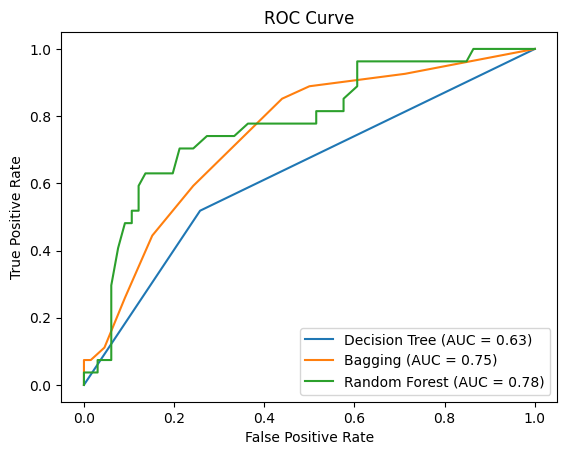

In [22]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC) of the 3 models
def plot_roc_curve(model, X_test, Y_test, label):
    Y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plot_roc_curve(model_1, X_test, Y_test, 'Decision Tree')
plot_roc_curve(model_2, X_test, Y_test, 'Bagging')
plot_roc_curve(model_3, X_test, Y_test, 'Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The random forest model has the best AUC 

The bagging model has a nice ROC curve

The decision tree  ROC curve is below the 2 others 